# LibRec - Post Processing

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 

In [2]:
import os
import sys
import numpy as np
from IPython.display import display
import pandas as pd
import logging
from glob import glob


HOME_DIR = os.environ['HOME']
PROJECT_DIR = '{}/projects/cikm2017/'.format(HOME_DIR)
CIKM_HDF5_DIR = '/Users/khalil/projects/cikm2017/data/hdf5/'
NDCG_DIR = '/Users/khalil/projects/cikm2017/data/ndcg/'
# HDF5_DIR = '/Users/khalil/projects/explanations/hdf5'
HDF5_DIR = CIKM_HDF5_DIR

sys.path.append(PROJECT_DIR)
os.chdir(PROJECT_DIR)

import cikm
from cikm import merge_predictions, filter_incomplete_sessions

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)
logger = logging.getLogger(__name__)

LIBREC_RESULT_DIR = '/Users/khalil/projects/librec/result/'
EXPLANATION_HDF5_TEMPLATE = os.path.join(HDF5_DIR, '{}-bw-nw-a00-sessions.h5')

# Paths to extraction files.
TA_EXTRACTION_CSV = '/Users/khalil/data/tripadvisor/extractions-ta.csv'
BA_EXTRACTION_CSV = '/Users/khalil/data/beeradvocate/extractions.csv'
YP_EXTRACTION_CSV = '/Users/khalil/data/yelp/extractions.csv'

EXTRACTION_CSVS = {'ta': TA_EXTRACTION_CSV, 
                   'ba': BA_EXTRACTION_CSV, 
                   'yp': YP_EXTRACTION_CSV}

ALGORITHMS = ('biasedmf', 'svdpp')

PREDICTION_FILE_FMT = os.path.join(LIBREC_RESULT_DIR, '{dataset}/rating/ratings.txt-{algorithm}-output/{algorithm}')

/Users/khalil/anaconda2/envs/cikm2017/lib/python3.6/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [3]:
for algorithm in ALGORITHMS:
    for dataset_sn, dataset_ln in zip(['ta', 'ba', 'yp'], ['tripadvisor', 'beeradvocate', 'yelp']):
        tmpl = 'Processing {dataset_ln} dataset (algorithm: {algo})'
        
        prediction_csv_path=PREDICTION_FILE_FMT.format(dataset=dataset_ln, algorithm=algorithm)
        explanation_hdf5_path=EXPLANATION_HDF5_TEMPLATE.format(dataset_sn)
        
        df_explanations = merge_predictions(extraction_csv_path=EXTRACTION_CSVS[dataset_sn], 
                                            prediction_csv_path=prediction_csv_path, 
                                            algorithm=algorithm, 
                                            explanation_hdf5_path=explanation_hdf5_path)
#         print('Columns: ', df_explanations.columns)
        n_unrated = len(df_explanations[pd.isnull(df_explanations['rank_{}'.format(algorithm)])].explanation_id.unique())
        print('Explanations without ratings: {:,}'.format(n_unrated))
        
        # Save to the CIKM data directory using the same filename.
        hdf_filename = explanation_hdf5_path[explanation_hdf5_path.rfind('/') + 1:]
        output_path = os.path.join(CIKM_HDF5_DIR, hdf_filename)
        df_explanations = filter_incomplete_sessions(df_explanations)
        df_explanations.to_hdf(path_or_buf=output_path, mode='w', complevel='blosc', key='index_session', 
                               format="fixed")

INFO:Loading extractions from /Users/khalil/data/tripadvisor/extractions-ta.csv


len(df_ratings)  226808
/Users/khalil/projects/librec/result/tripadvisor/rating/ratings.txt-biasedmf-output/biasedmf
Loaded 378,000 explanations
Explanations without ratings: 0


INFO:Loading extractions from /Users/khalil/data/beeradvocate/extractions.csv


len(df_ratings)  131702
/Users/khalil/projects/librec/result/beeradvocate/rating/ratings.txt-biasedmf-output/biasedmf
Loaded 1,302,560 explanations
Explanations without ratings: 0


INFO:Loading extractions from /Users/khalil/data/yelp/extractions.csv


len(df_ratings)  294657
/Users/khalil/projects/librec/result/yelp/rating/ratings.txt-biasedmf-output/biasedmf
Loaded 227,750 explanations
Explanations without ratings: 0


INFO:Loading extractions from /Users/khalil/data/tripadvisor/extractions-ta.csv


len(df_ratings)  226808
/Users/khalil/projects/librec/result/tripadvisor/rating/ratings.txt-svdpp-output/svdpp
Loaded 378,000 explanations
Explanations without ratings: 0


INFO:Loading extractions from /Users/khalil/data/beeradvocate/extractions.csv


len(df_ratings)  131702
/Users/khalil/projects/librec/result/beeradvocate/rating/ratings.txt-svdpp-output/svdpp
Loaded 1,302,560 explanations
Explanations without ratings: 0


INFO:Loading extractions from /Users/khalil/data/yelp/extractions.csv


len(df_ratings)  294657
/Users/khalil/projects/librec/result/yelp/rating/ratings.txt-svdpp-output/svdpp
Loaded 227,750 explanations
Explanations without ratings: 0


In [4]:
assert 1 == 2
# Compute NDCG
# Librec evals
# Rating density
# User & item stats.
# Feature stats
# Explanation stats.

AssertionError: 

## Compute NDCGs

In [5]:
from glob import glob

In [6]:
for path in glob(CIKM_HDF5_DIR + '*.*'):
    df_explanations = pd.read_hdf(path)

    df_ndcgs = cikm.compute_ndcg(df_explanations)
    df_ndcgs_summary = cikm.summarize_ndcg(df_ndcgs)
    suffix = path[path.rfind('/')+1:].replace('.h5', '')
    save_path = os.path.join(NDCG_DIR, 'ndcg-summary-{}.csv'.format(suffix))

    df_ndcgs_summary.to_csv(save_path, index=False)

In [7]:
assert 1 == 2

AssertionError: 

## Plot NDCGs

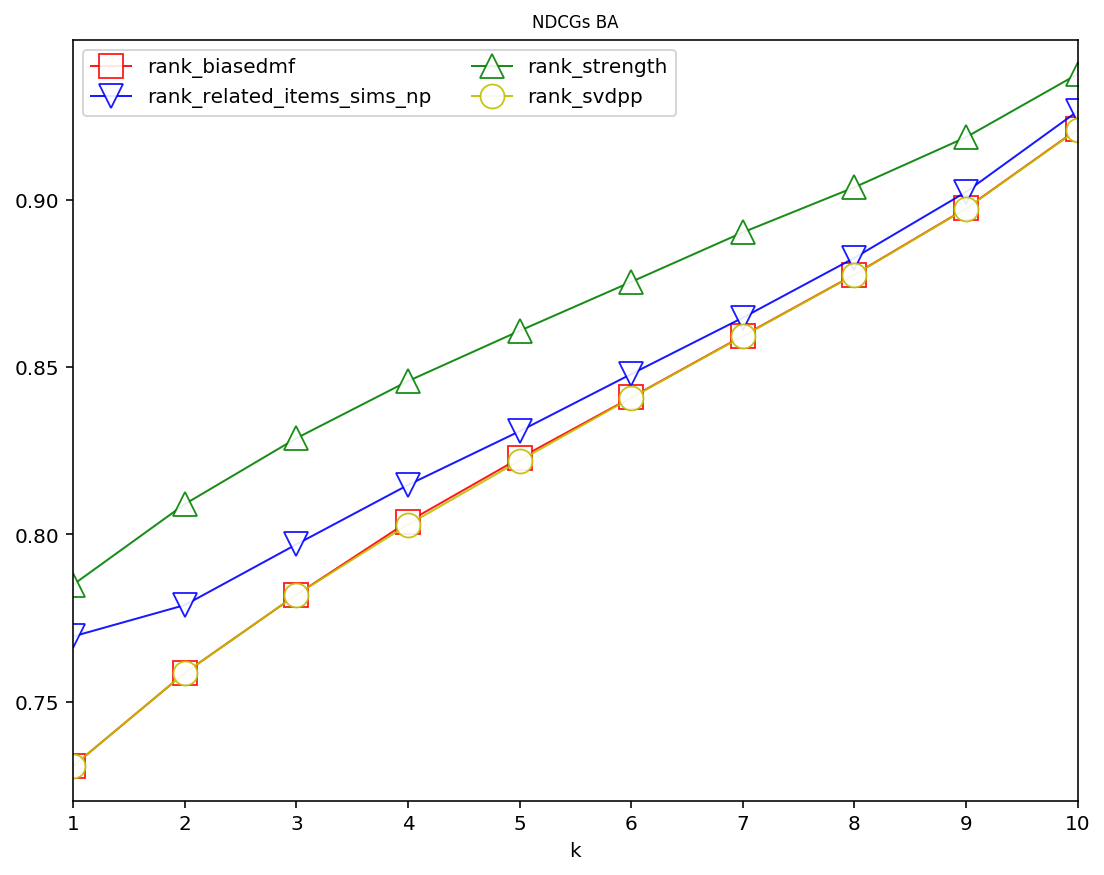

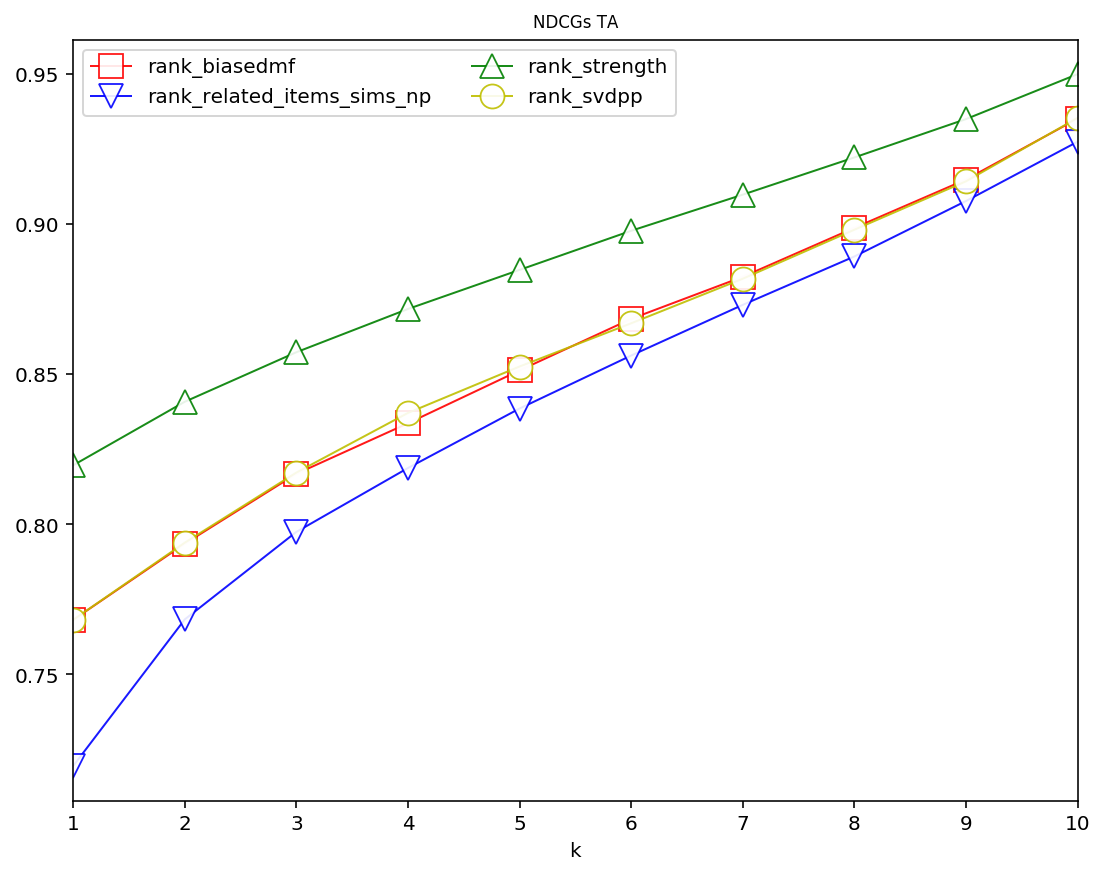

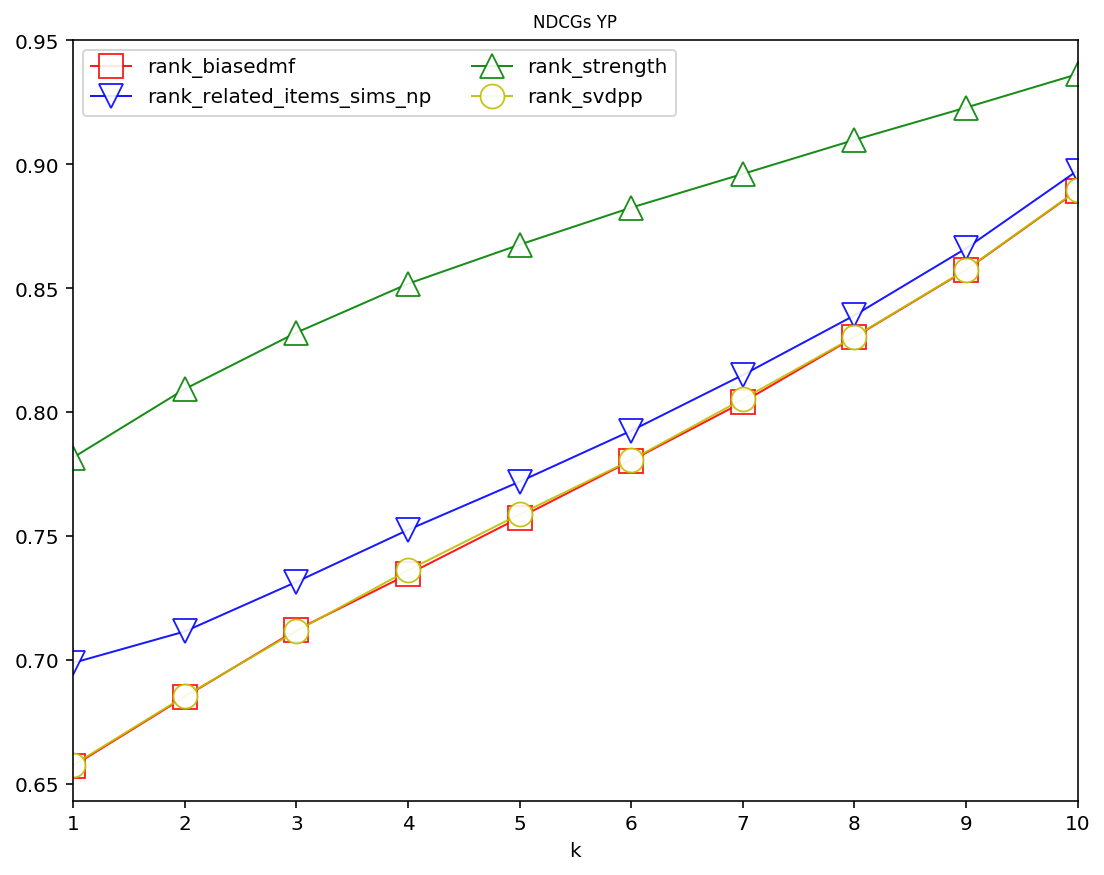

In [8]:
cols = ['rank_biasedmf', 'rank_svdpp', 'rank_strength', 'rank_related_items_sims_np']
for path in glob(NDCG_DIR + '*.csv'):
    if '-ta-' in path:
        title = 'TA'
    elif '-ba-' in path:
        title = 'BA'
    elif '-yp-' in path:
        title = 'YP'
    
    df_ndcgs_summary = pd.read_csv(path)
    df_ndcgs_summary = df_ndcgs_summary[df_ndcgs_summary.col.isin(cols)]
    cikm.plot_ndcg(df_ndcgs_summary, title='NDCGs ' + title)